### 서울시 구별 인구현황 및 CCTV 현황분석
####  -적절한 설치 비율을 통계를 통해서 시각화
####  - 평균이동선을 구현
####  - pandas  사용(기본 사용법)
####  -matplotlib 사용 (기본 차트 사용법)

In [188]:
import pandas as pd

In [189]:
s_cctv=pd.read_csv('../data/seoul_cctv.csv', encoding = 'utf-8')

In [190]:
s_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [191]:
s_cctv.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [192]:
s_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [193]:
s_cctv.columns[2]

'2013년도 이전'

In [194]:
s_cctv.index

RangeIndex(start=0, stop=25, step=1)

In [195]:
s_cctv.index[1]

1

In [196]:
# 컬럼명 변경
dic = {s_cctv.columns[0]:'자치구'}

# inplace = True # -> 원본에 적용해라
s_cctv.rename(columns = dic, inplace = True)

In [197]:
# 컬럼명이 변경된 것을 확인
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [198]:
# 인구 현황 로드하기 s_pop
# encoding시 utf-8이 아닐 수도 있음. iso8850 utf8 등 해봐야 알수있음
# 칼럼에 불필요하게 2개 더 들어가 있음
# 2부터 읽어온다
s_pop=pd.read_excel('../data/Report.xls', encoding='utf-8', header=2, usecols='B,D,G,J,N'  )

### 컬럼명 변경

In [199]:

# 계 -> 인구수, 계.1 한국인 계.2 -> 외국인, 65세 이상 고령자 -> 고령자로

s_pop.head(2)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512


- 총인구, 한국인 총수, 외국인 총수 등 특정열만 가져오기

In [200]:
dic={s_pop.columns[1]:'인구수',
     s_pop.columns[2]:'한국인',
     s_pop.columns[3]:'외국인',
     s_pop.columns[4]:'고령자'}

s_pop.rename(columns=dic, inplace=True)
s_pop.head(2)


,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512


In [201]:
# 첫째~넷째 컬럼을 '인구수', ... 으로 바꾸기

dic = {'계': "인구수",
       s_pop.columns[2]: "한국인",
       s_pop.columns[3]: "외국인",
       s_pop.columns[4]: "고령자",
      }
s_pop.rename(columns=dic, inplace=True)
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512


### pandas 기초 학습
- 합치기

In [202]:
# s_cctv 데이터에서 '소계' 컬럼을 기준으로 내림 차순 정렬, 최초 3개만 확인

s_cctv.sort_values(by='소계', ascending=False).head(3)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398


In [203]:
s_cctv.sort_values(by='소계', ascending=True).head(3)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174


- 집계수를 보고 여러 가설들이 발생 될 수 있다.
- 해당 자치구의 주거지역/상업지역/지하철(교통요인) 부분도 고려되면 좋겠다는 예상
- 주거지역은 cctv가 낮고, 상업 지역은 높아 보인다
- 2013 년도 이전 데이터 대비 3년간 증가된 cctv수에 대한 증가율을 살펴볼 필요가 이싿
- 최근 3년간 증가율 = (2014+2015+2016)2013*100
- 최근 증가율 이라는 컬럼명으로 추가하시오.

In [204]:
# 데이터 프레임의 컬럼
# 데이터의 순서가 동일하고 향후 년도 데이터만 추가된다는 전제
s_cctv.columns[3:]

Index(['2014년', '2015년', '2016년'], dtype='object')

In [205]:
# 사본 결과 

s_cctv[s_cctv.columns[3:]].head(2)

,2014년,2015년,2016년
0,430,584,932
1,99,155,377


In [206]:
# 누적합

s_cctv[s_cctv.columns[3:]].cumsum(axis=1).head(2)

,2014년,2015년,2016년
0,430,1014,1946
1,99,254,631


In [207]:
# 2016년 데이터만 (누적합의 데이터가 모인곳)

s_cctv[s_cctv.columns[3:]].cumsum(axis=1)[s_cctv.columns[-1:]].head(2)

,2016년
0,1946
1,631


In [208]:
# 위와 동일 결과

csum = s_cctv[['2014년','2015년','2016년']].cumsum(axis=1)
csum['2016년'].head(2)

0    1946
1     631
Name: 2016년, dtype: int64

In [209]:
# 위의 데이터를 series로 구성 -> 차원 축소 -> 슬라이싱 -> 인덱싱
tmp=s_cctv[s_cctv.columns[3:]].cumsum(axis=1)[s_cctv.columns[-1]]


In [210]:

s_cctv['최근 증가율']=tmp/s_cctv[s_cctv.columns[2]]*100

# print(s_cctv['최근증가율'])
s_cctv['최근 증가율2'] = (s_cctv['2014년']+s_cctv['2015년']+s_cctv['2016년'])/s_cctv['2013년도 이전']*100


In [211]:
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,최근 증가율2
0,강남구,3238,1292,430,584,932,150.619195,150.619195
1,강동구,1010,379,99,155,377,166.490765,166.490765


In [212]:
# 더미데이터 제거
try:
    del s_cctv['최근 증가율2']
except Exception as e:
    print(e)
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765


### 인구 현황 분석

In [213]:
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512


In [214]:
# 0 번 행 비교
s_pop.drop([0], inplace=True)

s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798


In [215]:
# 데이터 프레임의 고유값, 키로 검토중인 -> 자치구
# 고유함 검사

s_pop['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [216]:
len(s_pop['자치구'].unique())

25

In [222]:
len(s_pop.index) # 행이 개수와 자치구 컬럼데이터의 중복 제거 후 개수가 동일하므로 고유하다

25

In [217]:
# NaN 있을 경우 제거해야 함다 혹은 보간(주식)
# NaN 데이터 추출 
# 하나라도 참이 있는가? 있다면 NaN이 존재하는것임
# 체크방법 1 

s_pop['자치구'].isnull().any()

False

In [218]:
# 체크 방법 2

s_pop[s_pop['자치구'].isnull()].index

Int64Index([], dtype='int64')

In [219]:
# NaN 인 존재하면 해당 행을 모두 제거하라

if s_pop['자치구'].isnull().any():
    index = s_pop[s_pop['자치구'].isnull()].index
    s_pop.drop([index], inplace=True)
    print('NaN 제거됨')
    
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798


In [223]:
# 전체 인구 대비 외국인 비율, 고령자 비율 계산

s_pop['외국인비율']=s_pop['외국인']/s_pop['인구수']*100
s_pop['고령자비율']=s_pop['고령자']/s_pop['인구수']*100
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163569,153780,9789,26512,5.984630,16.208450
2,중구,135427,126032,9395,21798,6.937317,16.095756


In [224]:
# 외국인 비율 기준 내림차순 정렬해서 샘플로 2개 출력

s_pop.sort_values(by='외국인비율', ascending=False).head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404501,369003,35498,54994,8.775751,13.595516
18,금천구,252752,233263,19489,34945,7.710720,13.825806


In [225]:
s_pop.sort_values(by='고령자비율', ascending=False).head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,326063,322385,3678,57401,1.128003,17.604267
1,종로구,163569,153780,9789,26512,5.984630,16.208450


### 데이터 병합
- 인구대비 cctv 주제를 분석하기 위해서
- 개별 데이터프레임을 하나로 합쳐야한다

In [226]:
# 교집합
# on = 한쪽에 금정구 있고 한쪽에는 없다면 안됨(교집합 inner join)
# left/right on 합집합 outer join

data_result = pd.merge(s_cctv, s_pop, on='자치구')
data_result.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,379,99,155,377,166.490765,437050,432749,4301,57680,0.984098,13.197575


In [227]:
# 2013~2016년 제거

try:
    del data_result['2013년도 이전']
    del data_result['2014년도']
    del data_result['2015년도']
    del data_result['2016년도']
except Exception as e:
    print(e)

'2014년도'


In [228]:
data_result.head(2)

,자치구,소계,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,99,155,377,166.490765,437050,432749,4301,57680,0.984098,13.197575


In [229]:
# 인덱스가 단순히 0~ 시작하는 의미없는 숫자이다
# 2차원 시각화 할때 (x좌표(좌우), y좌표(상하))
# 키로 사용한 그리고, 고류한 값을 가진 컬럼 -> 자치구 -> 인덱스로 변경하겠다
# 특정컬럼 인덱스화

data_result.set_index('자치구', inplace=True)
data_result.head(2)

,소계,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,
강남구,3238,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941
강동구,1010,99,155,377,166.490765,437050,432749,4301,57680,0.984098,13.197575


# 상관계수
- 데이터 분석이란 남의 데이터로 분석해주는 직업
- 따라서 고객에게 "너희 데이터는 잘못되었다" 또는 "이 물품을 팔아라" 할게 아니라
- 상관계수를 제시하며 의견 제시
- 상관계수 : 
    - ~0.1 이하 : 무시
    - ~0.3 이하 : 약한 상관관계
    - ~0.7 이하 : 뚜렷한 상관 관계
    - np.corrcoef(): 상관계수 계산 함수
    - 대각선을 기준으로 대칭
    

## cctv 소계 대비 인구수, 고령자비율, 외국인비율 어떤 상관잇는지 체크


In [230]:
import numpy as np

np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.22536935],
       [0.22536935, 1.        ]])

In [231]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.04749504],
       [-0.04749504,  1.        ]])

In [232]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.26836087],
       [-0.26836087,  1.        ]])

In [233]:
# CCTV 소계 중심 정렬
# CCTV 소계 대비 인구에 대한 결과치가 잘 안보인다 -> 시각화
data_result.sort_values(by='소계', ascending=False).head(3)

,소계,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,
강남구,3238,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941
양천구,2482,142,30,467,34.671731,471026,467151,3875,56742,0.822672,12.046469
서초구,2297,157,336,398,63.371266,443989,439844,4145,54614,0.933582,12.300755


In [234]:
data_result.sort_values(by='인구수', ascending=False).head(3)

,소계,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,
송파구,1081,21,68,463,104.347826,673161,666439,6722,79093,0.998572,11.749492
강서구,911,258,184,81,134.793814,606981,600257,6724,78042,1.107778,12.857404
노원구,1566,57,451,516,188.929889,553177,549365,3812,75741,0.689110,13.692001


## 시각화 (플로팅)
- cctv 
- 데이터 현황을 살펴 본다

In [235]:
import matplotlib.pyplot as plt

# 주피터 내장
%matplotlib inline

# 한글처리
import platform
from matplotlib import font_manager, rc

In [257]:

platform.system()

# import matplotlib as mpl
# mpl.matplotlib_fname()
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# Nanum이 포함된것을 s에 리스트에 담아 출력
[s for s in font_list if "Nanum" in s]
# plt.rc('font', family='NanumGothic')

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf']

In [258]:
# # 한글 처리 모든 방법 한번에 찾는 코드
# plt. rcParams['axes.unicode_minus'] = False
# if platform.system()     == 'Darwin': # 맥
#     font_list_mac=fm.OSXInstalledFonts()
#     rc('font', family    == 'AppleGothic')
# elif platform.system()   == 'Linux': # 리눅스
#     rc('font', family     = 'NanumGothic')
# elif platform.system()   == 'Window':
#     rc('font', family     = 'NanumGothic')
#     #폰트 차후 확인
#     #fontName=font_manager.fontProperties(fname=fontPath).get_name()
#     fontName = font_manager.FontProperties(fname=fontPath).get_name()
#     rc('font', family=fontName)
# else:
#     print('알수없는 시스템. 미적용')

#한글처리모든 방법 한번에 찾는 코드
plt.rcParams['axes.unicode_minus']=False
if platform.system()=='Darwin':#맥
    font_list_mac=fm.OSXInstalledFonts()
    rc('font',family='Applegothic')
elif platform.system()=='Linux':#리눅스
    rc('font',family='NanumGothic')
elif platform.system()=='Windows':#윈도우
    #폰트 차후 확인
    #fontName=font_manager.fontProperties(fname=fontPath).get_name()
    rc('font',family='NanumGothic')
else:
    print('알수없는 시스템.미적용')

In [259]:
data_result.head(2)

,소계,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
자치구,,,,,,,,,,,,,
강남구,3238,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
강동구,1010,99,155,377,166.490765,437050,432749,4301,57680,0.984098,13.197575,0.231095,541.597345


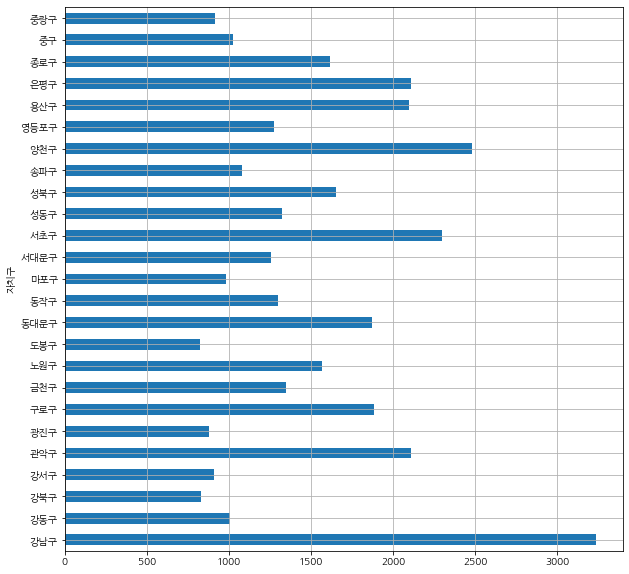

In [260]:
plt.figure()

# 차트 모양 ; barh : bar + h (수평선 차트)
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()
# 소계가 많은 순부터 시각화 하시오

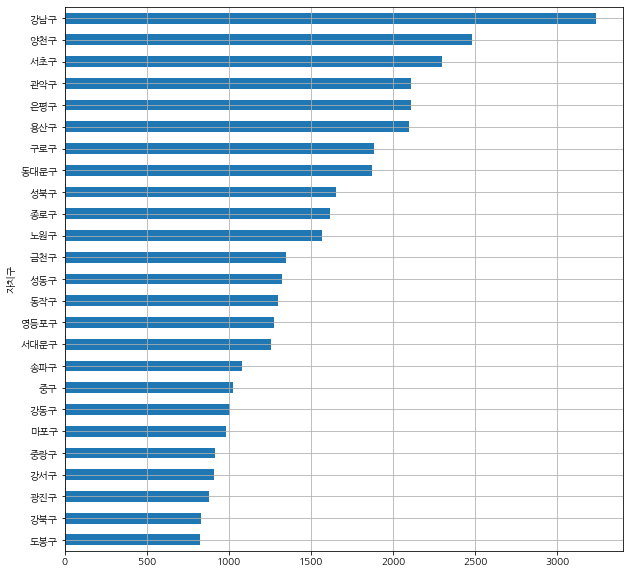

In [261]:
plt.figure()
#해당 컬러만 소트해서 시각화
data_result['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
#내림차순으로 정렬하여 그래프 정렬 > sort_values()
plt.show()

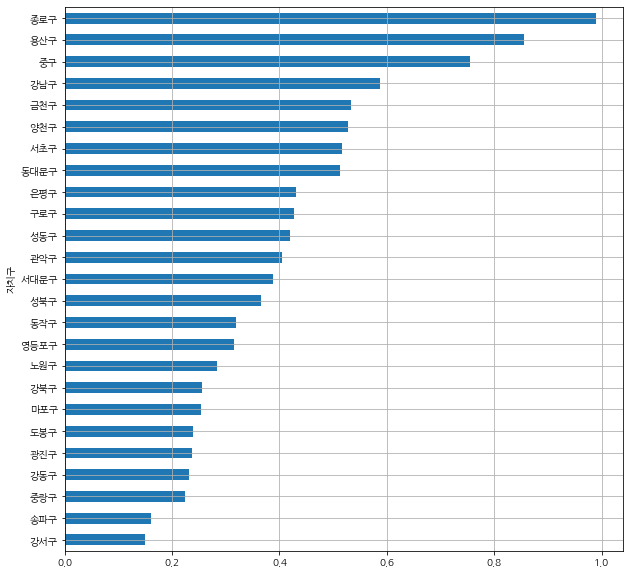

In [262]:
# 인구당 cctv 설치 비율
# cctv 비율 = 소계/인구수 *100

data_result['cctv비율'] = data_result['소계']/data_result['인구수']*100
data_result['cctv비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

#종로구가 인구대비 가장 많이 CCTV를 설치한 지역
# 인구대비 설치 비율이 적절한지 판단 > 적절한 설치 비율을 찾아야 한다.


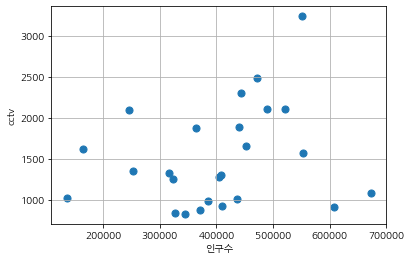

In [263]:
# x축 인구수, y축은 cctv 수는 분포도 표현
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()



In [264]:
#numpy에서 지원되는 함수를 이용하여
#인구수:입력 소계:출력 > 이것을 만족하는 함수(모델)을 생성
#함수를 1차,2차,3차,~15차,1차만 수행
#입력대비 출력을 만족하는 1차 함수 생성
#1차함수 y=ax+b>기울기, 절편
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1) #기울기를 만들어주는 함수 polyfit
fp1
#[기울기, 절편]

array([1.08389848e-03, 1.07787951e+03])

In [265]:
#함수 생성
f1=np.poly1d(fp1)

In [266]:
#x값은 100000~700000 사이 100씩 증가
x=np.linspace(100000, 700000, 100)

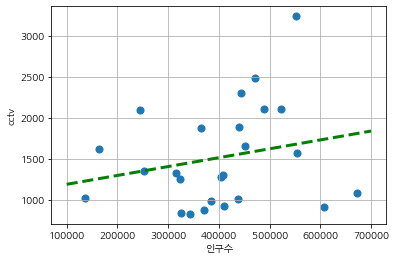

In [267]:
#시각화 
plt.scatter(data_result['인구수'],data_result['소계'], s=50)
#인구 대비 cctv의 관계를 1차함수로 표현한 선
plt.plot(x, f1(x), ls='dashed', lw=3, color ='g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [268]:
# 오차율 계산 = 절대값(소계 - f1(인구수))
data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수']))
df_sort = data_result.sort_values( by='오차', ascending=False)
df_sort.head(2)

,소계,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
자치구,,,,,,,,,,,,,
강남구,3238,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
양천구,2482,142,30,467,34.671731,471026,467151,3875,56742,0.822672,12.046469,0.526935,893.576120


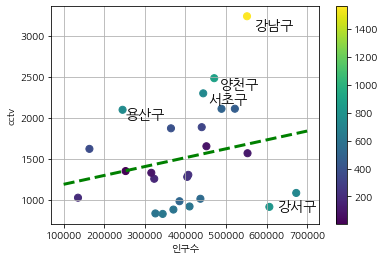

<Figure size 432x288 with 0 Axes>

In [283]:
# 시각화

plt.scatter(data_result['인구수'], data_result['소계'],
                       c=data_result['오차'],
                        s=50)

# 인구대비 CCTV의 관계를 1차 ㅎ마수로 표현한 선
plt.plot(x, f1(x), ls='dashed', lw=3, color ='g')

for n in range(5):
    plt.text(df_sort['인구수'][n]*1.03, # 겹치지 않게 어긋나게
            df_sort['소계'][n]*0.95,
            df_sort.index[n], fontSize=14)

plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.colorbar()
plt.show()
plt.savefig('graph1.png')

In [284]:
# 결과 저장
data_result.to_csv

<bound method NDFrame.to_csv of         소계  2014년  2015년  2016년      최근 증가율     인구수     한국인    외국인    고령자  \
자치구                                                                         
강남구   3238    430    584    932  150.619195  551888  546952   4936  66011   
강동구   1010     99    155    377  166.490765  437050  432749   4301  57680   
강북구    831    120    138    204  125.203252  326063  322385   3678  57401   
강서구    911    258    184     81  134.793814  606981  600257   6724  78042   
관악구   2109    260    390    613  149.290780  521960  504048  17912  71317   
광진구    878     78     53    174   53.228621  370519  355748  14771  44806   
구로구   1884    173    246    323   64.973730  440305  407235  33070  60564   
금천구   1348     51    269    354  100.000000  252752  233263  19489  34945   
노원구   1566     57    451    516  188.929889  553177  549365   3812  75741   
도봉구    825    159     42    386  246.638655  344096  341928   2168  54969   
동대문구  1870     23    198    579   74.766355 